In [1]:
#............................................Training & Testing using deep learning......................................#
import os
import cv2
import time
import numpy as np
from keras.layers import Conv2D 
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.models import Sequential, save_model
#from keras.utils import np_utils
from keras.utils import to_categorical
#from tensorflow.keras.utils import to_categorical
#from keras.src.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings(action = 'ignore')
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
path = 'Preprocessed/Train/'

In [3]:
gestures = os.listdir(path)

In [4]:
gestures

['click', 'dclick', 'down', 'left', 'none', 'right', 'up']

In [5]:
dict_labels = {
    'click':1,
    'dclick': 2,
    'down': 3,
    'left':4,
    'none':5,
    'right':6,
    'up':7
    
    
    
    
    
}

In [6]:
print(list(dict_labels.keys()))

['click', 'dclick', 'down', 'left', 'none', 'right', 'up']


In [7]:
x, y = [], []
for ix in gestures:
    images = os.listdir(path + ix)
    for cx in images:
        img_path = path + ix + '/' + cx
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0 
        x.append(img)
        y.append(dict_labels[ix])

In [8]:
X = np.array(x)
Y = np.array(y)
Y = to_categorical(Y)
print(type(Y),len(Y))
Y.shape

<class 'numpy.ndarray'> 7000


(7000, 8)

<Axes: ylabel='count'>

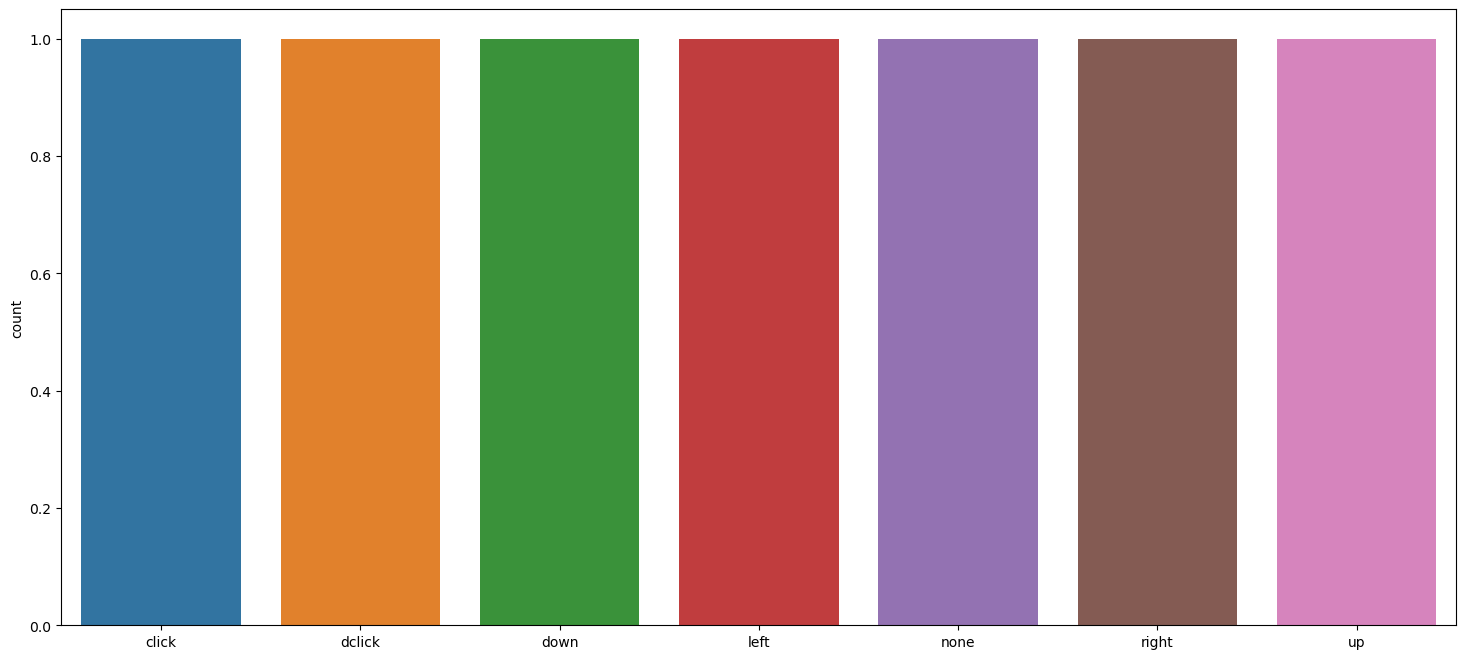

In [9]:
plt.figure(figsize = (18,8)) 
sns.countplot(x=list(dict_labels.keys()))

In [10]:
Y.shape

(7000, 8)

In [11]:
categories = Y.shape[1]

In [12]:
X, Y = shuffle(X, Y, random_state=0)

In [13]:
X.shape

(7000, 50, 50, 1)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [15]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4900, 50, 50, 1) (2100, 50, 50, 1)
(4900, 8) (2100, 8)


In [16]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(categories, activation = 'softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,728 (807.53 KB)

 Trainable params: 206,728 (807.53 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [18]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=[X_test, Y_test])

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 25s 476ms/step - accuracy: 0.6337 - loss: 1.1360 - val_accuracy: 0.9990 - val_loss: 0.0133
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 463ms/step - accuracy: 0.9936 - loss: 0.0231 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 476ms/step - accuracy: 0.9995 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 3.0141e-04
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 507ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 6.6210e-04
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 475ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 3.5431e-04
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 473ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 1.0000 - val_loss: 3.7431e-05
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 485ms/step - accuracy: 1.0000 - loss: 3.0959e-04 - val_accuracy: 1.0000 - val_loss: 2.1272e-05
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 461ms/step - accuracy: 1.0000 -

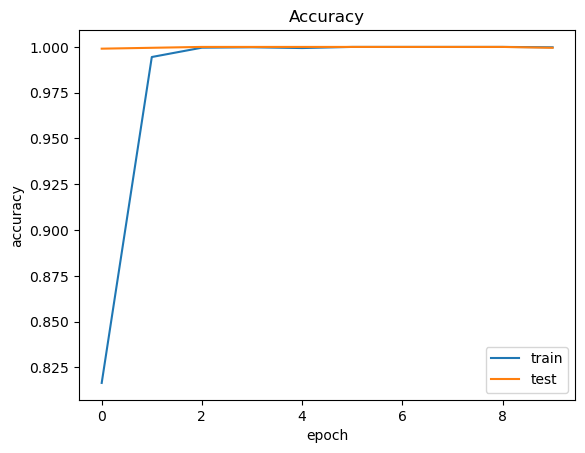

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test']) 
plt.show()

In [20]:
model.save('CNN_model.h5')

In [21]:
m = load_model('CNN_model.h5')

In [22]:
test_data = os.listdir('Test/')

In [23]:
dict_labels

{'click': 1, 'dclick': 2, 'down': 3, 'left': 4, 'none': 5, 'right': 6, 'up': 7}

In [24]:
    for ix in test_data:
        print(ix)

click
dclick
down
left
none
right
up


In [25]:
x, y = [], []
for ix in test_data:
    images = os.listdir('Test/' + ix)
    for cx in range(1,10):
        img_path = 'Test/' + ix + '/' + str(cx) + '.jpg'
        print(img_path)
        img = cv2.imread(img_path, 0)
        img = img.reshape((50,50,1))
        img = img/255.0
        x.append(img)
        y.append(dict_labels[ix])

Test/click/1.jpg
Test/click/2.jpg
Test/click/3.jpg
Test/click/4.jpg
Test/click/5.jpg
Test/click/6.jpg
Test/click/7.jpg
Test/click/8.jpg
Test/click/9.jpg
Test/dclick/1.jpg
Test/dclick/2.jpg
Test/dclick/3.jpg
Test/dclick/4.jpg
Test/dclick/5.jpg
Test/dclick/6.jpg
Test/dclick/7.jpg
Test/dclick/8.jpg
Test/dclick/9.jpg
Test/down/1.jpg
Test/down/2.jpg
Test/down/3.jpg
Test/down/4.jpg
Test/down/5.jpg
Test/down/6.jpg
Test/down/7.jpg
Test/down/8.jpg
Test/down/9.jpg
Test/left/1.jpg
Test/left/2.jpg
Test/left/3.jpg
Test/left/4.jpg
Test/left/5.jpg
Test/left/6.jpg
Test/left/7.jpg
Test/left/8.jpg
Test/left/9.jpg
Test/none/1.jpg
Test/none/2.jpg
Test/none/3.jpg
Test/none/4.jpg
Test/none/5.jpg
Test/none/6.jpg
Test/none/7.jpg
Test/none/8.jpg
Test/none/9.jpg
Test/right/1.jpg
Test/right/2.jpg
Test/right/3.jpg
Test/right/4.jpg
Test/right/5.jpg
Test/right/6.jpg
Test/right/7.jpg
Test/right/8.jpg
Test/right/9.jpg
Test/up/1.jpg
Test/up/2.jpg
Test/up/3.jpg
Test/up/4.jpg
Test/up/5.jpg
Test/up/6.jpg
Test/up/7.jpg
Te

In [26]:
X_t = np.array(x)
y_t = np.array(y) 
Y_t = to_categorical(y_t)

In [27]:
X_t.shape

(63, 50, 50, 1)

In [28]:
y_pred = m.predict(X_t)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [29]:
acc = accuracy_score(Y_t, y_pred.round())
print('Accuracy:', acc)

Accuracy: 0.14285714285714285


In [30]:
print(classification_report(y_pred.round(), Y_t))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.17      0.29        54
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

   micro avg       0.14      0.17      0.15        54
   macro avg       0.12      0.02      0.04        54
weighted avg       1.00      0.17      0.29        54
 samples avg       0.14      0.14      0.14        54

